In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('C:\\Users\\amalm\\OneDrive\\Desktop\\Data Science\\resale-flat-prices-based-on-approval-date-1990-1999.csv')
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [3]:
q1 = df1['resale_price'].quantile(0.25)
q1

127000.0

In [4]:
q2 = df1['resale_price'].quantile(0.50)
q2

195000.0

In [5]:
q3 = df1['resale_price'].quantile(0.75)
q3

298000.0

In [6]:
IQR = q3-q1
IQR

171000.0

In [7]:
low_limit = q1 - (1.5*IQR)
low_limit

-129500.0

In [8]:
upper_limit = q3 + (1.5*IQR)
upper_limit

554500.0

In [9]:
outliers = df1.loc[(df1['resale_price']<low_limit) | (df1['resale_price']>upper_limit)].index
outliers

Int64Index([ 88311,  88312,  90081,  91755,  91952,  93492,  93495,  93497,
             93498,  94338,
            ...
            286248, 286324, 286325, 286326, 286327, 286661, 286668, 286674,
            286807, 286808],
           dtype='int64', length=3906)

C:\Users\amalm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resale_price'>

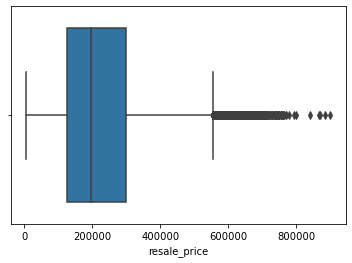

In [10]:
sns.boxplot(df1['resale_price'])

In [11]:
df2 = df1.drop(outliers)
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


C:\Users\amalm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resale_price'>

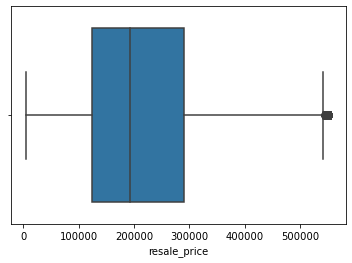

In [12]:
sns.boxplot(df2['resale_price'])

In [13]:
df2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [30]:
def find_iqr(dataframe,columns):
    q1=dataframe[columns].quantile(0.25)
    q2=dataframe[columns].quantile(.50)
    q3=dataframe[columns].quantile(0.75)
    
    IQR =q3-q1
    low_lmt=q1-1.5*IQR
    upp_lmt=q3+1.5*IQR
    return low_lmt,upp_lmt

columns=['lease_commence_date','resale_price','floor_area_sqm']
outliers={}
for column in columns:
    low_lmt,upp_lmt=find_iqr(df1,column)
    outliers[column]=[low_lmt,upp_lmt]
print(outliers)    

{'lease_commence_date': [1967.0, 1999.0], 'resale_price': [-129500.0, 554500.0], 'floor_area_sqm': [0.5, 180.5]}


In [31]:
low_lmt

0.5

In [32]:
upp_lmt

180.5

In [33]:
outliers

{'lease_commence_date': [1967.0, 1999.0],
 'resale_price': [-129500.0, 554500.0],
 'floor_area_sqm': [0.5, 180.5]}

In [38]:
df1[(df1['lease_commence_date']<outliers['lease_commence_date'][0]) | (df1['lease_commence_date']>outliers['lease_commence_date'][1])].index

Int64Index([], dtype='int64')

In [47]:
drop1 = []

for k in columns:
    drop1.append(df1[(df1[k]<outliers[k][0]) | (df1[k]>outliers[k][1])].index.values)

In [48]:
drop1

[array([], dtype=int64),
 array([], dtype=int64),
 array([  3203,  11125,  28257,  29332,  31519,  32746,  40563,  44967,
         47516,  52455,  54661,  54662,  61205,  64854,  67471,  68381,
         69547,  72437,  80647,  82586,  82587,  88313,  88990,  88993,
         90079,  90080,  91396,  93069,  93494,  94985,  94988,  95453,
         97303,  97304,  99795, 101345, 102958, 105014, 108514, 108515,
        111292, 111621, 114926, 116357, 119053, 127313, 128457, 150427,
        181767, 191931, 191932, 191933, 195699, 195700, 195701, 195702,
        199710, 199712, 199714, 199715, 199716, 199718, 199719, 200837,
        204047, 204049, 204498, 205270, 207080, 208500, 208501, 208502,
        208504, 208505, 208506, 208507, 208510, 208511, 208512, 208514,
        208515, 208518, 208519, 208520, 208936, 211654, 213231, 213233,
        213234, 213235, 213237, 213239, 213240, 213699, 214757, 218839,
        218840, 218847, 218851, 218852, 218853, 218855, 219400, 220281,
        222292

In [49]:
for i in drop1:
    df1.drop(i,inplace=True)

In [50]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000
